# Assignment 10

### 1.复习上课内容

### 2. 回答一下理论题目

#### 1. What is independent assumption in Naive bayes ?
Ans：对于特征而言，表示每个特征是相互独立的；对于句子而言，表示句子中的每个词是相互独立的。

#### 2. What is MAP(maximum a posterior) and ML(maximum likelihood) ?
Ans:ML为取似然函数最大时的参数为其估计值。MAP为取后验函数最大时的参数为其估计值，而后验函数是似然函数和先验概率的积。

#### 3. What is support vector in SVM?
Ans:当α_i>0时，所形成的（x_i,y_i）就是支持向量，既是边界上的点。

#### 4. What is the intuition behind SVM ?
Ans:通过$minf(\alpha)=\frac{1}{2}\Sigma_{i=1,j=1}^n\alpha_i\alpha_jx_ix_jy_iy_j-\Sigma_{i=1}^n\alpha_i$可以求得$\alpha_i$和$\alpha_j$,然后在$\alpha_i>0$的情况下，求得w和b，然后求得svm超平面函数，即得使各分类在支持向量间平行距离最大的函数。

#### 5. Shortly describ what 'random' means in random forest ?
Ans:第一：随机选择样本。
   第二：在选完样本后，随机选择特征。

#### 6. What cariterion does XGBoost use to find the best split point in a tree ?
Ans:在叶子节点中，使得$Obj=-\Sigma_{j}{\frac{G_{j}^2}{h_{j}+\lambda}}+3\gamma$最小，或者是从信息熵角度考虑，使用$\frac{1}{2}[{\frac{G_{L}^2}{H_{L}+\lambda}}+{\frac{G_{R}^2}{H_{R}+\lambda}}-{\frac{(G_{L}+G_{R})^2}{{H_{L}+H_{R}}+\lambda}}]-\lambda$进行分类。

### 3. Practial part

##### Problem description: In this part you are going to build a classifier to detect if a piece of news is published by the Xinhua news agency (新华社）.

#### Hints:

###### 1. Firstly, you have to come up with a way to represent the news. (Vectorize the sentence, you can find different ways to do so online)  

In [116]:
import pandas as pd
import jieba
import numpy as np

def build_data(train_data_path):
    train_df = read_file(train_data_path)
    print('read file success')
    stop_words = load_stop_words('data/哈工大停用词表.txt')
    print('stop_words success')
    main_content = cut_words(train_df, cut, stop_words)
    return main_content

def read_file(file_path):
    '''
    加载数据文件
    :param file_path: 文件路径，str
    :return: 加载的数据，dataframe
    '''
    get_data = pd.read_csv(file_path, encoding='gb18030')
    get_data.dropna(subset=['source', 'content'], how='any', inplace=True)
    return get_data

def load_stop_words(stop_word_path):
    '''
    加载停用词
    :param stop_word_path:停用词路径，str
    :return: 停用词表，list
    '''
    # 打开文件
    file = open(stop_word_path, 'r', encoding='utf-8')
    # 读取所有行
    stop_words = file.readlines()
    # 去除每一个停用词前后 空格 换行符
    stop_words = [stop_word.strip() for stop_word in stop_words]
    file.close()
    return stop_words

def filter_stopwords(words, stop_words):
    '''
    过滤停用词
    :param words: 切好词的列表, list
    :param stop_words: 加载停用词表后的停用词列表, list
    :return: 过滤后的停用词, list
    '''
    return [word for word in words if word not in stop_words]

def cut(text, stop_words):
    '''
    分词并且过滤停用词
    :param text: 待分词文本，str
    :param stop_words: 停用词列表，list
    :return: 分词且过滤后词，以空格分开，str
    '''
    cut_words = list(jieba.cut(text))
    words = [word for word in cut_words if word.strip() != '']
    words = filter_stopwords(words, stop_words)
    return ' '.join(words)

def cut_words(train_data, cut, stop_words):
    '''
    对dataframe中content列分词，并另存到main_content中
    :param train_data: 待分词的文本集，dataframe
    :param cut: 分词过滤停用词函数,function
    :param stop_words: 停用词表, list
    :return: 对content列分词后的新dataframe数据，dataframe
    '''
    main_content = pd.DataFrame()
    main_content['source'] = train_data['source'].fillna('')
    main_content['content'] = train_data['content'].fillna('')
    main_content['tokenized_content'] = main_content['content'].apply(cut, args=(stop_words,))
    return main_content

def save_cut_file(file_path, main_content):
    '''
    保存分词到txt文件
    :param main_content: 带分词的dataframe数据,dataframe
    :return:
    '''
    with open(file_path, 'w', encoding='utf-8') as f:
        f.write(' '.join(main_content['tokenized_content'].tolist()))
    return word_frequency

In [169]:
file_path = './data/news.csv'
#main_content = build_data(cf.source_data_path)
main_content = build_data(file_path)

read file success
stop_words success


In [171]:
main_content_copy = main_content.copy()
print(main_content_copy['tokenized_content'][0])

本周 6 月 12 日 小米 手机 6 15 款 机型 外 机型 已 暂停 更新 发布 含 开发 版 体验版 内测 稳定版 暂不受 影响 确保 工程师 集中 全部 精力 进行 系统优化 工作 有人 猜测 精力 主要 用到 MIUI 9 研发 之中 MIUI 8 去年 5 月 发布 距今已有 一年 有余 更新换代 当然 MIUI 9 确切 信息 等待 官方消息


In [172]:
main_content_copy.head()

,source,content,tokenized_content
0,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,本周 6 月 12 日 小米 手机 6 15 款 机型 外 机型 已 暂停 更新 发布 含 ...
1,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,骁龙 835 唯一 Windows 10 桌面 平台 认证 ARM 处理器 高通 强调 不会...
2,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,此前 一加 3T 搭载 3400mAh 电池 DashCharge 快充 规格 5V 4A ...
3,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,这是 6 月 18 日 葡萄牙 中部 大 佩德罗 冈 地区 拍摄 森林 大火 烧毁 汽车 新...
4,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,原 标题 44 岁 女子 跑 深圳 约会 网友 拒 暴雨 中 裸身 奔走 … … 深圳 交警...


In [223]:
main_content_copy = main_content.copy()

In [224]:
main_content_copy['target'] = main_content_copy['source'].apply(lambda r:1 if r.find('新华') != -1 else 0)

In [225]:
target = main_content_copy['target'].values
target

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

Text(0.5, 0, '新华社/非新华社比例')

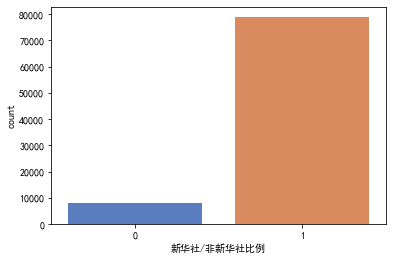

In [233]:
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

main_content_copy['target'].value_counts()
sns.countplot(x='target',data=main_content_copy,palette="muted")
plt.xlabel("新华社/非新华社比例")

In [181]:
from gensim.models.doc2vec import TaggedDocument
 
#创建标签化文档
main_content_tags = main_content_copy.apply(
    lambda r: TaggedDocument(words=r['tokenized_content'], tags=[r['target']]), axis=1)

In [185]:
main_content_tags[3]

TaggedDocument(words='这是 6 月 18 日 葡萄牙 中部 大 佩德罗 冈 地区 拍摄 森林 大火 烧毁 汽车 新华社 记者 张立 云摄', tags=[1])

In [186]:
def train_doc2vec(tag_document, size=150, epoch=1):
    model = doc2vec.Doc2Vec(tag_document, dm=0, alpha=0.025, vector_size=size, min_alpha=0.025, min_count=20)
    for epoch in range(epoch):
        if epoch%2 == 0:
            print('now training epoch %s'%epoch)
        model.train(tag_document, total_examples=model.corpus_count, epochs=epoch)
        model.alpha = 0.002
        model.min_alpha = model.alpha
    return model

In [187]:
model = train_doc2vec(list(main_content_tags), size=150, epoch=2)

now training epoch 0


In [189]:
print(model.docvecs.similarity(0, 1))

0.17749417


In [200]:
doc_vectors = [model.infer_vector(doc.words.split(' '), steps=20) for doc in main_content_tags]

###### 2. Secondly,  pick a machine learning algorithm that you think is suitable for this task

In [234]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(doc_vectors, target, test_size=0.3, random_state=42)

In [238]:
print(np.array(X_train).shape)
print(np.array(X_test).shape)
print(np.array(y_train).shape)
print(np.array(y_test).shape)

(60936, 150)
(26116, 150)
(60936,)
(26116,)


In [407]:
from sklearn import svm
import time

clf=svm.SVC()
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [408]:
%%time
predict = clf.predict(X_test)

Wall time: 16 s


In [409]:
from sklearn.metrics import accuracy_score

# 调用accuracy_score计算分类准确度
print('Accuracy rate：{}'.format(accuracy_score(y_test,predict)))

Accuracy rate：0.9914228825241231


In [410]:
print('Accuracy rate：{}'.format(sum(predict == y_test)/len(y_test)))

Accuracy rate：0.9914228825241231


In [411]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
clf.score(X_train, y_train)

0.9921557043455429

In [412]:
clf.score(X_test,y_test)

0.9914228825241231

In [413]:
from sklearn.metrics import f1_score

f1_score(y_test,predict)

0.995261265072985

In [414]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      2436
           1       1.00      0.99      1.00     23680

    accuracy                           0.99     26116
   macro avg       0.97      0.98      0.98     26116
weighted avg       0.99      0.99      0.99     26116



In [415]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test,predict)
cnf_matrix

array([[ 2369,    67],
       [  157, 23523]], dtype=int64)

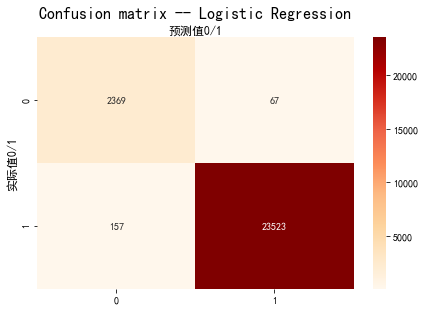

In [416]:
def plot_cnf_matirx(cnf_matrix,description):
    class_names = [0,1]
    fig,ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks,class_names)
    plt.yticks(tick_marks,class_names)

#create a heat map
    sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'OrRd',
               fmt = 'g')
    ax.xaxis.set_label_position('top')
    plt.tight_layout()
    plt.title(description, y = 1.1,fontsize=16)
    plt.ylabel('实际值0/1',fontsize=12)
    plt.xlabel('预测值0/1',fontsize=12)
    plt.show()
    
plot_cnf_matirx(cnf_matrix,'Confusion matrix -- Logistic Regression')

In [417]:
#画ROC曲线
def plot_roc_curve(fprs,tprs):
    plt.figure(figsize=(8,6),dpi=80)
    plt.plot(fprs,tprs)
    plt.plot([0,1],linestyle='--')
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.ylabel('TP rate',fontsize=15)
    plt.xlabel('FP rate',fontsize=15)
    plt.title('ROC曲线',fontsize=17)
    plt.grid()
    plt.show()

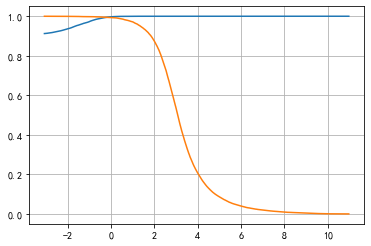

In [418]:
from sklearn.metrics import precision_recall_curve

scores = clf.decision_function(X_test)

precisions,recalls,thresholds = precision_recall_curve(y_test,scores)
plt.plot(thresholds,precisions[:-1])
plt.plot(thresholds,recalls[:-1])
plt.grid()
plt.show() 

In [419]:
from sklearn.metrics import roc_curve, auc
fprs,tprs,thresholds = roc_curve(y_test,scores)

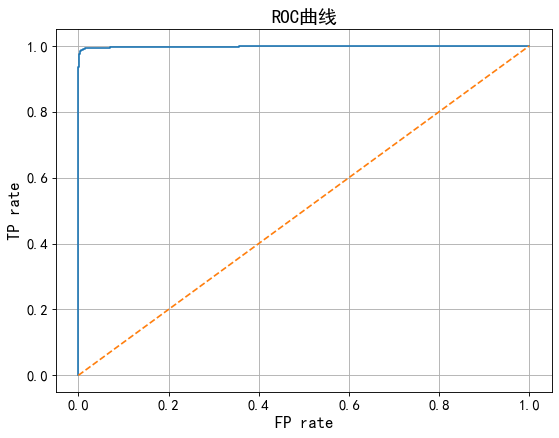

In [420]:
# 此处调用前面的绘制函数
plot_roc_curve(fprs,tprs)

In [421]:
roc_auc_score(y_test,scores)

0.9982056178715663

### Congratulations! You have completed all assignments in this week. The question below is optional. If you still have time, why don't try it out.

## Option:

#### Try differnt machine learning algorithms with different combinations of parameters in the practical part, and compare their performances (Better use some visualization techiniques).

In [422]:
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance

In [423]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [424]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

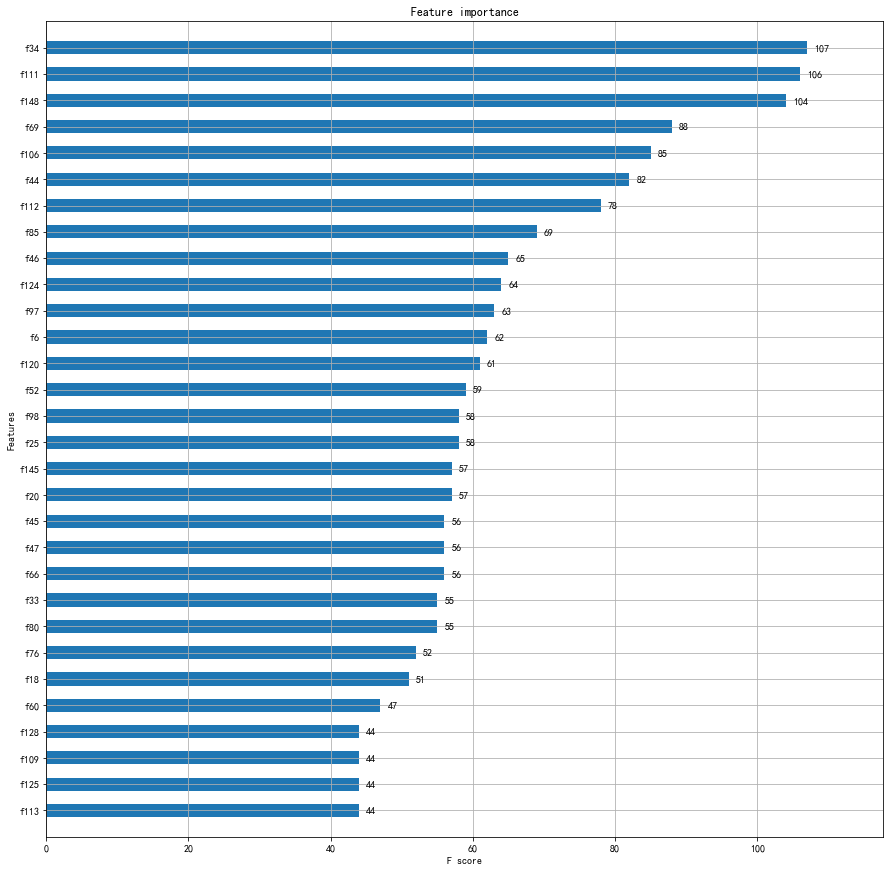

In [425]:
fig,ax = plt.subplots(figsize=(15,15))
plot_importance(xgb, height=0.5, ax=ax, max_num_features=30)
plt.show()
#图中显示doc2vec中下标为33，110，147的代表的特征贡献最大。

In [426]:
%%time
predict_xgb = xgb.predict(X_test)

Wall time: 260 ms


In [427]:
from sklearn.metrics import accuracy_score

# 调用accuracy_score计算分类准确度
print('Accuracy rate：{}'.format(accuracy_score(y_test,predict_xgb)))

Accuracy rate：0.9889722775310155


#### 在默认参数的情况下，这个二分类任务中，xgboost的准确率比SVM的准确率大概低0.01，但是预测时间会快非常多。

In [428]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
xgb.score(X_train, y_train)

1.0

In [429]:
xgb.score(X_test,y_test)

0.9889722775310155

In [430]:
from sklearn.metrics import f1_score

f1_score(y_test,predict_xgb)

0.9939137785291632

In [431]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict_xgb))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2436
           1       0.99      0.99      0.99     23680

    accuracy                           0.99     26116
   macro avg       0.96      0.97      0.97     26116
weighted avg       0.99      0.99      0.99     26116



In [432]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test,predict_xgb)
cnf_matrix

array([[ 2312,   124],
       [  164, 23516]], dtype=int64)

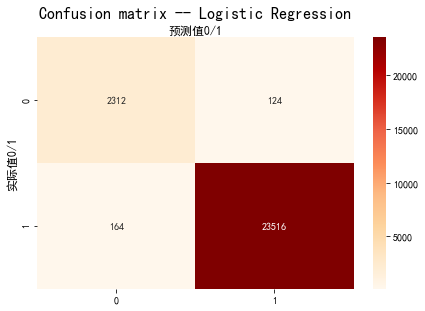

In [433]:
def plot_cnf_matirx(cnf_matrix,description):
    class_names = [0,1]
    fig,ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks,class_names)
    plt.yticks(tick_marks,class_names)

#create a heat map
    sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'OrRd',
               fmt = 'g')
    ax.xaxis.set_label_position('top')
    plt.tight_layout()
    plt.title(description, y = 1.1,fontsize=16)
    plt.ylabel('实际值0/1',fontsize=12)
    plt.xlabel('预测值0/1',fontsize=12)
    plt.show()
    
plot_cnf_matirx(cnf_matrix,'Confusion matrix -- Logistic Regression')

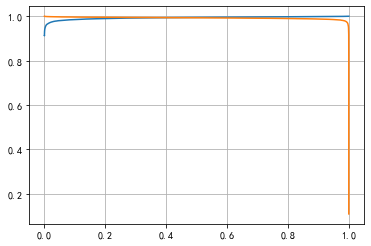

In [434]:
from sklearn.metrics import precision_recall_curve

scores = xgb.predict_proba(X_test)

precisions,recalls,thresholds = precision_recall_curve(y_test, scores[:, 1])
plt.plot(thresholds,precisions[:-1])
plt.plot(thresholds,recalls[:-1])
plt.grid()
plt.show() 

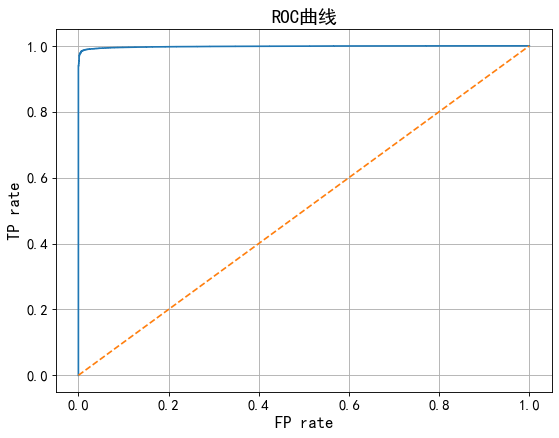

In [435]:
from sklearn.metrics import roc_curve, auc
fprs,tprs,thresholds = roc_curve(y_test, scores[:, 1])
# 此处调用前面的绘制函数
plot_roc_curve(fprs,tprs)

In [436]:
roc_auc_score(y_test, scores[:, 1])

0.9981380693732526